In [1]:
#We are basically trying to understand that whether the trader behaves differently if the market is greedy or fearful.
'''
We have 2 datasets
Dataset 1- Market sentiment (Fear / Greed)
Dataset 2- Trader activity and profit/loss

So we would follow the following steps:-
Clean → combine → analyze → explain → suggest strategy
'''

'\nWe have 2 datasets\nDataset 1- Market sentiment (Fear / Greed)\nDataset 2- Trader activity and profit/loss\n\nSo we would follow the following steps:-\nClean → combine → analyze → explain → suggest strategy\n'

In [5]:
#Uploading the CSV files
import pandas as pd
#Use the below statement if your notebook and csv files are in one folder
#sentiment = pd.read_csv("fear_greed.csv")
#trades = pd.read_csv("historical_trader_data.csv")

sentiment = pd.read_csv(r"C:\Users\brahm\Downloads\fear_greed_index.csv")
trades = pd.read_csv(r"C:\Users\brahm\Downloads\historical_data.csv")



In [6]:
#Tells the number of rows/columns
print(sentiment.shape)
print(trades.shape)

#Tells other related info about data 
print(sentiment.info())
print(trades.info())

#If any null values 
print(sentiment.isnull().sum())
print(trades.isnull().sum())

#If any duplicate values
print(sentiment.duplicated().sum())
print(trades.duplicated().sum())


(2644, 4)
(211224, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Sta

In [11]:
''' We could see that the sentiment dataset has rows and columns(2644, 4)
whereas the trades dataset has (211224, 16) rows and columns.
There is no null or duplicate values to be found

'''

' We could see that the sentiment dataset has rows and columns(2644, 4)\nwhereas the trades dataset has (211224, 16) rows and columns.\nThere is no null or duplicate values to be found\n\n'

In [12]:
#Standardizing the name of columns as python is a case sensitive language
trades.columns = trades.columns.str.strip().str.lower().str.replace(" ", "_")
sentiment.columns = sentiment.columns.str.strip().str.lower().str.replace(" ", "_")


In [15]:
#We’re basically converting text into date-time format and extracting the date part.
trades["timestamp_ist"] = pd.to_datetime(trades["timestamp_ist"], errors="coerce")
trades["date"] = trades["timestamp_ist"].dt.date

sentiment["date"] = pd.to_datetime(sentiment["date"]).dt.date


In [16]:
'''
errors="coerce"
tells pandas what to do if it finds invalid date values.

What "coerce" means
It means:

“If conversion fails, replace the value with NaT (not a time) instead of throwing an error.”'''

'\nerrors="coerce"\ntells pandas what to do if it finds invalid date values.\n\nWhat "coerce" means\nIt means:\n\n“If conversion fails, replace the value with NaT (not a time) instead of throwing an error.”'

In [17]:
print(trades["date"].head())
print(sentiment["date"].head())


0    2024-02-12
1    2024-02-12
2    2024-02-12
3    2024-02-12
4    2024-02-12
Name: date, dtype: object
0    2018-02-01
1    2018-02-02
2    2018-02-03
3    2018-02-04
4    2018-02-05
Name: date, dtype: object


In [18]:
df = trades.merge(
    sentiment[["date", "classification"]],
    on="date",
    how="left"
)
#Left join which means keep all rows from trades, and add sentiment if available.

In [19]:
df[["date", "classification"]].head()


,date,classification
0,2024-02-12,Greed
1,2024-02-12,Greed
2,2024-02-12,Greed
3,2024-02-12,Greed
4,2024-02-12,Greed


In [20]:
df["classification"].isnull().sum()


175360

In [21]:
#As seen above some trade records did not have matching sentiment data and were removed before analysis.

In [22]:
df = df.dropna(subset=["classification"])


In [23]:
df["classification"].isnull().sum()


0

In [24]:
#Now coming to Fear vs Greed performance

In [25]:
df.groupby("classification")["closed_pnl"].mean()


classification
Extreme Fear       1.891632
Extreme Greed    205.816345
Fear             128.287950
Greed             53.988003
Neutral           27.088803
Name: closed_pnl, dtype: float64

In [26]:
df.groupby("classification")["closed_pnl"].sum()


classification
Extreme Fear     4.399937e+03
Extreme Greed    1.156894e+06
Fear             1.779226e+06
Greed            6.096325e+05
Neutral          7.465674e+04
Name: closed_pnl, dtype: float64

In [28]:
df["win"] = (df["closed_pnl"] > 0).astype(int)



In [29]:
df.groupby("classification")["win"].mean()


classification
Extreme Fear     0.292777
Extreme Greed    0.553282
Fear             0.381787
Greed            0.435707
Neutral          0.494920
Name: win, dtype: float64

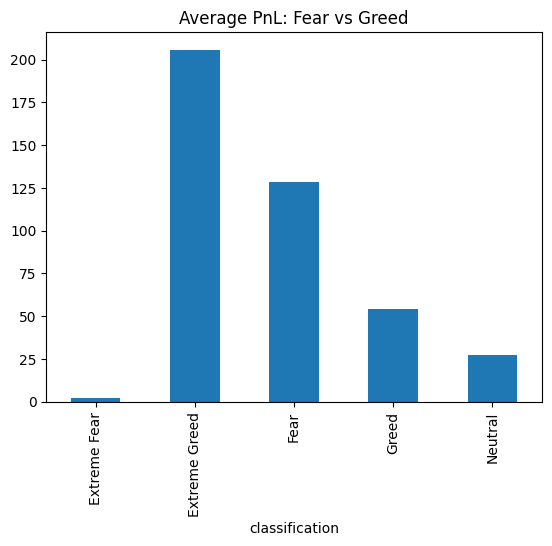

<Figure size 640x480 with 0 Axes>

In [43]:
import matplotlib.pyplot as plt

df.groupby("classification")["closed_pnl"].mean().plot(kind="bar")
plt.title("Average PnL: Fear vs Greed")
plt.show()
plt.savefig("average_pnl_fear_vs_greed.png", dpi=300, bbox_inches="tight")



In [31]:
#From the above graph we could understand that in extreme greed the PnL is high were as in extreme fear it is low.
#Hence, trader is behaving according to the market


In [32]:
#To check if trader change behavior based on sentiment.

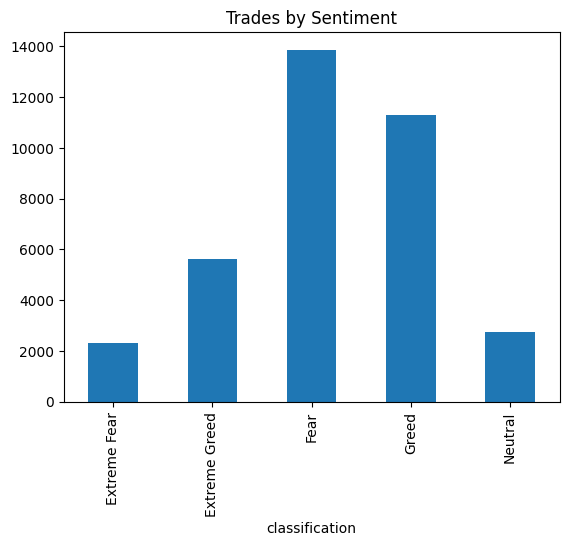

In [44]:
df.groupby("classification").size().plot(kind="bar", title="Trades by Sentiment")
plt.savefig("trades_by_sentiment.png", dpi=300, bbox_inches="tight")


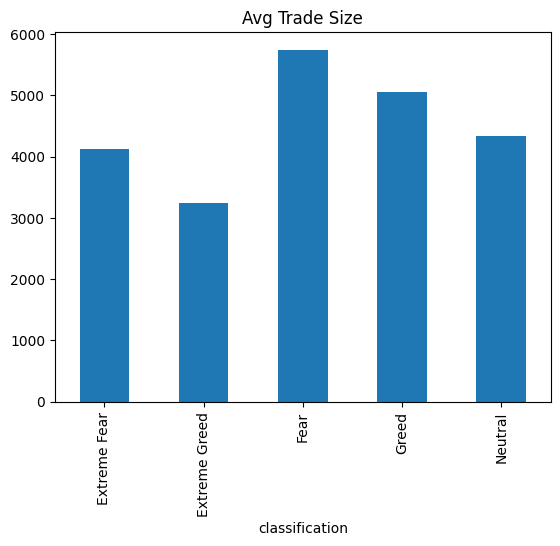

In [45]:
df.groupby("classification")["size_usd"].mean().plot(kind="bar", title="Avg Trade Size")
plt.savefig("Avg_trade_size.png", dpi=300, bbox_inches="tight")


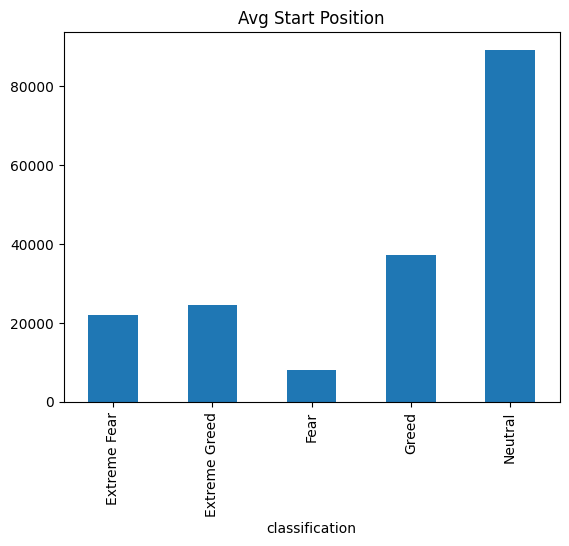

In [46]:
df.groupby("classification")["start_position"].mean().plot(kind="bar", title="Avg Start Position")
plt.savefig("Avg_start_position.png", dpi=300, bbox_inches="tight")


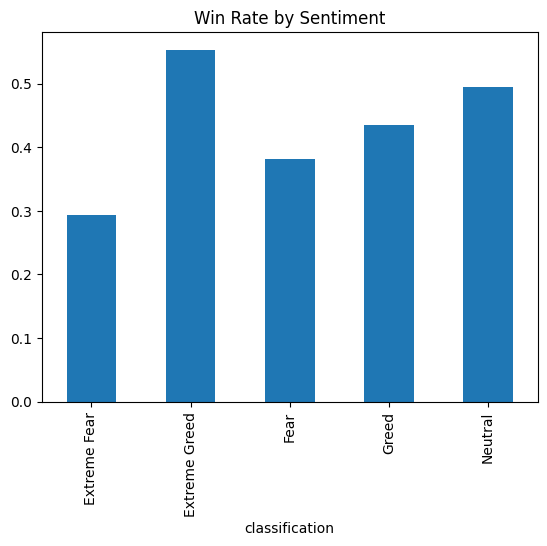

In [47]:
df.groupby("classification")["win"].mean().plot(kind="bar", title="Win Rate by Sentiment")
plt.savefig("win_rate.png", dpi=300, bbox_inches="tight")


In [37]:
'''
From chart 1 Traders are most active during Fear periods, suggesting uncertainty in markets leads to increased trading activity.
From chart 2 Traders take larger positions during Fear periods, indicating higher risk-taking when markets are uncertain.
From chart 3 Trader win rate improves during bullish sentiment periods and declines during extreme fear conditions.
'''

'\nFrom chart 1 Traders are most active during Fear periods, suggesting uncertainty in markets leads to increased trading activity.\nFrom chart 2 Traders take larger positions during Fear periods, indicating higher risk-taking when markets are uncertain.\nFrom chart 3 Trader win rate improves during bullish sentiment periods and declines during extreme fear conditions.\n'

In [38]:
trade_counts = df["account"].value_counts()

df["activity_segment"] = df["account"].apply(
    lambda x: "Frequent" if trade_counts[x] > trade_counts.median() else "Occasional"
)


In [39]:
trader_profit = df.groupby("account")["closed_pnl"].sum()

df["profit_segment"] = df["account"].apply(
    lambda x: "Profitable" if trader_profit[x] > 0 else "Losing"
)


In [40]:
df["size_segment"] = df["size_usd"].apply(
    lambda x: "Large" if x > df["size_usd"].median() else "Small"
)


In [41]:
df.groupby("activity_segment")["closed_pnl"].mean()
df.groupby("profit_segment")["closed_pnl"].mean()
df.groupby("size_segment")["closed_pnl"].mean()


size_segment
Large    193.630063
Small      8.511833
Name: closed_pnl, dtype: float64

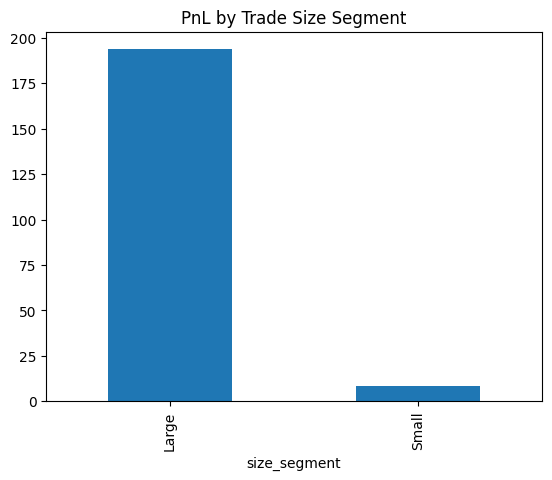

In [48]:
df.groupby("size_segment")["closed_pnl"].mean().plot(
    kind="bar",
    title="PnL by Trade Size Segment"
)
plt.savefig("Pnl by trade size.png", dpi=300, bbox_inches="tight")
